# **Análisis del Problema del Viajero-Desarrollo por las redes de Hopfield**

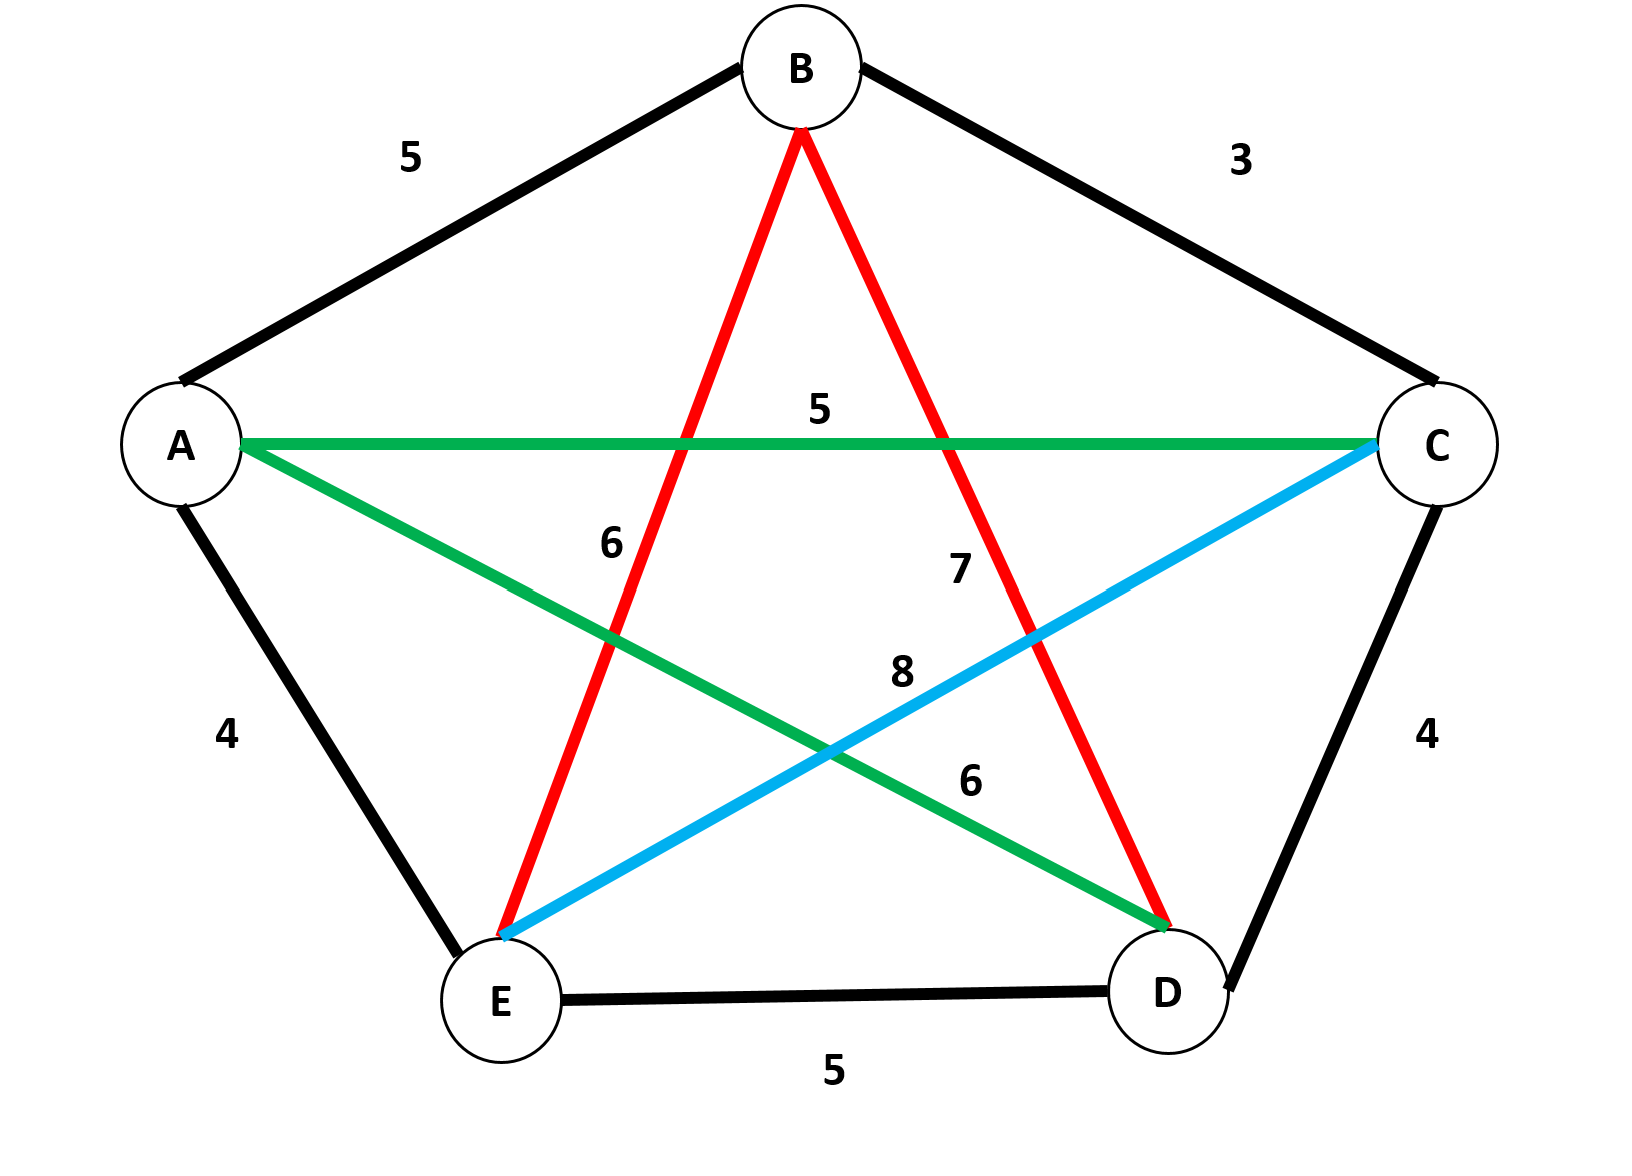

**Primer paso: Método Convencional**: Voy a desarrollar un análisis en primera instancia con la librería networkx de Python que permite crear, manipular y estudiar redes gráficas. Luego de esta parte procederé a revisarlo con el método de Hopfield para seguir con el componente expuesto en las tareas.

In [34]:
import networkx as nx

In [35]:
G = nx.DiGraph()
G.add_edge("A", "B", weight=5)
G.add_edge("A", "C", weight=5)
G.add_edge("A", "D", weight=6)
G.add_edge("A", "E", weight=4)
G.add_edge("B", "C", weight=3)
G.add_edge("B", "D", weight=7)
G.add_edge("B", "E", weight=6)
G.add_edge("C", "D", weight=4)
G.add_edge("C", "E", weight=8)
G.add_edge("D", "E", weight=5)


**En esta parte observo que con el método convencional me llega a los puntos directos, pero no es lo que busco para este caso, por lo que dejo solo planteado algunos ejemplos con Dijstra.**

In [36]:
nx.dijkstra_path(G, source="A", target="D")

['A', 'D']

In [37]:
nx.dijkstra_path_length(G, source="A", target="D")

6

**Segundo Paso: Matriz de Distancias con grafos no dirigidos**

**Si desarrollo un análisis clásico, la llegada de un punto A  auno B no tendría, problema, pero como no se busca de un solo punto a otro punto, sino de múltiples puntos en donde no se repita las ciudades, debo abordar el problema de maner diferente. Para este caso en particular tendré presente el concepto de grafo no dirigido con el propósito de desarrollar tours no cerrados, además tendré en cuenta de manera ordenada lo siguiente:**

*   **Formulación del Problema: Procederé a representar cada ciudad y posición en los viajes con una matriz de neuronas V[i][j], donde i será la ciudad y j la posición del tour.**
*   **Restricciones: Dentro de las restricciones cada ciudad solo se podrá visitar una sola vez, en este caso serían las filas de la matriz y tendría el desarrollo de una función de energía que me permitiría minimizar la distancia total del tour y penalizar soluciones inválidas**.








In [38]:
import numpy as np

cities = ['A', 'B', 'C', 'D', 'E']
n = len(cities)
city_index = {c: i for i, c in enumerate(cities)}

# Matriz de distancias (simétrica)
dist = np.full((n, n), np.inf)
np.fill_diagonal(dist, 0)

edges = [
    ('A', 'B', 5), ('A', 'C', 5), ('A', 'D', 6), ('A', 'E', 4),
    ('B', 'C', 3), ('B', 'D', 7), ('B', 'E', 6),
    ('C', 'D', 4), ('C', 'E', 8),
    ('D', 'E', 5)
]

for u, v, w in edges:
    i, j = city_index[u], city_index[v]
    dist[i][j] = w
    dist[j][i] = w  # Grafo no dirigido

In [39]:
print(dist[i][j]) #Reviso que si estén ingresando valores en esta variable que me indica las distancias en cada posición

5.0


**Tercer Paso: Creación de la Red de Holfield**

In [40]:
# Parámetros
PRF = 500  # Peso restricción filas
PRC = 500  # Peso restricción columnas
PD = 200  # Peso distancia
dt = 0.001  # Paso de tiempo
max_iter = 1000  # Iteraciones máximas

# Inicializar neuronas (activaciones aleatorias)
V = np.random.rand(n, n) * 0.1 + 0.45  # Valores cerca de 0.5

# Simulación
for _ in range(max_iter):
    for i in range(n):
        for j in range(n):
            # Términos de restricción
            sum_row = np.sum(V[i, :]) - V[i, j]
            sum_col = np.sum(V[:, j]) - V[i, j]

            # Término de distancia
            next_j = (j + 1) % n
            prev_j = (j - 1) % n
            sum_dist = np.sum(dist[i, :] * (V[:, next_j] + V[:, prev_j]))

            # Actualizar entrada
            U_ij = -PRF * sum_row - PRC * sum_col - PD * sum_dist

            # Actualizar activación (función sigmoide)
            V[i, j] += dt * U_ij
            V[i, j] = 1 / (1 + np.exp(-V[i, j]))  # Mantener entre 0 y 1

    # Normalizar para evitar saturaciones
    V = (V - np.min(V)) / (np.max(V) - np.min(V))

In [41]:
print(dist[i][j])
print(sum_dist)

0.0
1.1133079818699492


**En esta sección visualizaré si el Tour expuesto para resolver es válido o no**

In [42]:
tour_indices = np.argmax(V, axis=0)
tour = [cities[i] for i in tour_indices]

# Verificar validez
if len(set(tour)) == n:
    print("Tour válido:", tour)
else:
    print("Tour inválido. Ajustar parámetros o reiniciar.")

Tour inválido. Ajustar parámetros o reiniciar.


# **Para este caso me aparece el que el tour es inválido, tocaría revisarlo a fondo ya en clase para observar una posible mejora para que sea válido**